In [1]:
# Importing the libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# Data collection and processing
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [8]:
correlation = gold_data.corr()

C:\Users\91932\AppData\Local\Temp\ipykernel_26428\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


In [9]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot: >

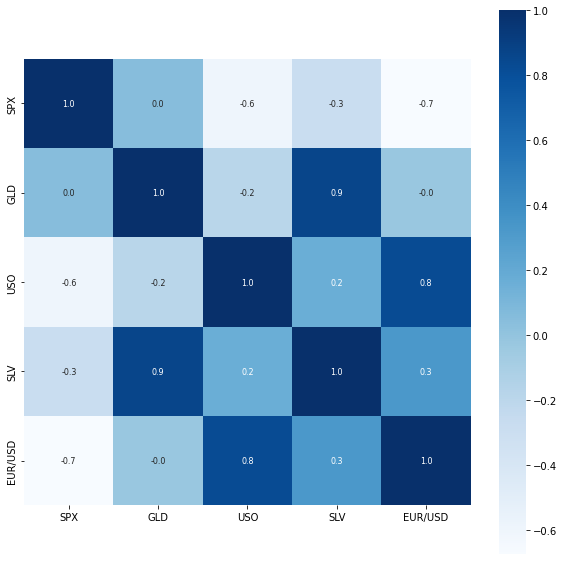

In [10]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True , square=True , fmt='.1f' , annot = True , annot_kws={'size':8} , cmap = 'Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\91932\AppData\Local\Temp\ipykernel_26428\441101937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'] , color = 'green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

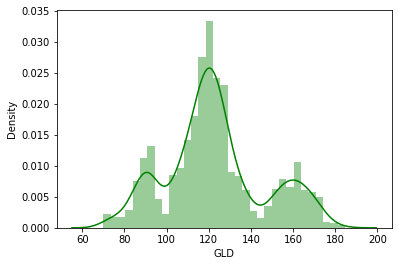

In [12]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'] , color = 'green')

In [13]:
# Splitting the features and target
X = gold_data.drop(['Date' , 'GLD'] , axis = 1)
Y = gold_data['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
# Splitting into training and test data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.1 , random_state = 2)

In [17]:
# Model Training : Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
# Training the model
regressor.fit(X_train , Y_train)

RandomForestRegressor()

In [20]:
# Prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.44589909  82.53279968 114.36280015 127.49040087 121.28710036
 154.03389996 149.68029874 126.1217005  117.30799858 126.13310013
 116.32520111 172.26810071 140.98319752 167.82569853 115.14040034
 117.90770082 137.94670365 169.81700068 159.47069998 152.33449937
 155.1479     125.66700003 174.88349912 156.73270251 125.1221002
  93.83540005  78.4685997  120.55640049 119.17609967 167.47749971
  88.26960045 125.16789944  90.81540063 117.56760039 121.03289919
 135.23489965 115.63330127 115.67340062 146.10529952 107.22620103
 104.6326017   86.94019774 126.45750034 118.18990001 153.25439947
 119.57970004 109.06319915 108.07059802  93.20800025 127.1725977
  74.04750074 113.55039932 120.46789924 111.2788995  118.89119929
 121.28789963 159.37829981 166.34620073 146.61419704  86.3109997
  94.25460032  86.88599912  90.87639997 119.11000074 126.41430068
 127.62429997 168.97560082 122.25419945 117.36719896  98.42540007
 168.10560123 142.93159825 132.63430399 121.03630112 122.60149933
 119.65360044

In [24]:
# R squared error 
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887593996494948


In [25]:
# Compare the actual values and predicted values in a plot
Y_test = list(Y_test)

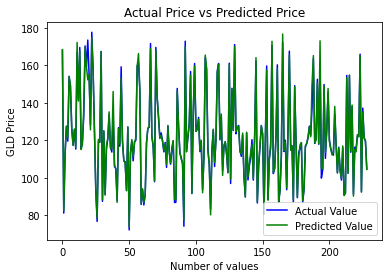

In [28]:
plt.plot(Y_test , color = 'blue' , label = 'Actual Value')
plt.plot(test_data_prediction , color = 'green' , label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()